In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.options.display.max_columns = 100

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [22]:
data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.886700     56.315775    37.199645   
std     4859.01902     43.587592      0.812852     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000      5.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

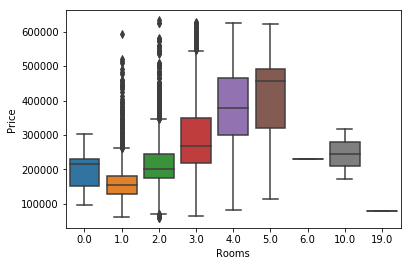

In [9]:
sns.boxplot(data['Rooms'], data['Price'])

In [14]:
data.loc[data['Rooms'] == 19, 'Rooms'] = 1
data.loc[data['Rooms'] == 6, 'Rooms'] = 2
data.loc[data['Rooms'] == 10, 'Rooms'] = 2

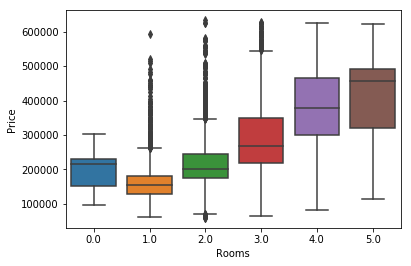

In [16]:
sns.boxplot(data['Rooms'], data['Price'])

In [68]:
sup_df = data[['Rooms', 'Square', 'LifeSquare']]
sup_df['ls_percent'] = data['LifeSquare'] / data['Square']

/Users/anastasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
sup_df

Rooms      Square  LifeSquare  ls_percent
0       2.0   47.981561   29.442751    0.613626
1       3.0   65.683640   40.049543    0.609734
2       2.0   44.947953   29.197612    0.649587
3       2.0   53.352981   52.731512    0.988352
4       1.0   39.649192   23.776169    0.599663
5       3.0   80.384479   46.683720    0.580755
6       2.0   62.254114   37.160377    0.596914
7       2.0   80.312926         NaN         NaN
8       2.0   64.511437         NaN         NaN
9       1.0   46.461409   18.915552    0.407124
10      2.0   46.304907   27.922584    0.603016
11      3.0   68.808859   45.736906    0.664695
12      2.0   54.522805   31.759753    0.582504
13      3.0   68.102739   39.311493    0.577238
14      1.0   53.769097   52.408027    0.974687
15      3.0   73.612225   53.892089    0.732108
16      2.0   49.360648   31.993964    0.648167
17      2.0   57.969964   32.012483    0.552225
18      1.0   44.513481   23.113423    0.519245
19      3.0  110.959792   56.996765    0.513670
20      3.0  103.605292   47.799426    0.461361
21      2.0   64.711835         NaN         NaN
22      1.0   41.668650   20.207762    0.484963
23      3.0  118.907612         NaN         NaN
24      3.0   62.180536   44.169694    0.710346
25      2.0   82.667915         NaN         NaN
26      3.0  106.958871    0.641822    0.006001
27      2.0   64.556209         NaN         NaN
28      1.0   42.530043         NaN         NaN
29      2.0   48.372232   31.007581    0.641020
...     ...         ...         ...         ...
9970    3.0   53.430413   34.603687    0.647640
9971    2.0   58.629682   36.330029    0.619652
9972    3.0   82.147338         NaN         NaN
9973    2.0   48.201451   33.396431    0.692851
9974    1.0   33.227093   32.639166    0.982306
9975    2.0   60.055527         NaN         NaN
9976    2.0   58.853794         NaN         NaN
9977    2.0   38.599779   22.740244    0.589129
9978    2.0   67.510526         NaN         NaN
9979    2.0   56.203601   34.292901    0.610155
9980    2.0   49.975125   32.786612    0.656059
9981    2.0   53.537800   30.979054    0.578639
9982    1.0   39.195153   22.158768    0.565345
9983    2.0   64.311707   61.920700    0.962822
9984    3.0   64.074977   47.633428    0.743401
9985    1.0   38.968338         NaN         NaN
9986    2.0   64.994245         NaN         NaN
9987    2.0   55.620092         NaN         NaN
9988    2.0   54.167124   33.766477    0.623376
9989    3.0   90.055233   47.860231    0.531454
9990    3.0   57.373889   39.688445    0.691751
9991    3.0  101.622794   51.628780    0.508043
9992    3.0   78.249637   49.385096    0.631122
9993    3.0   80.631333   48.899083    0.606453
9994    2.0   64.864198         NaN         NaN
9995    2.0   50.401785   30.476203    0.604665
9996    1.0   41.521546   20.539216    0.494664
9997    1.0   47.939008         NaN         NaN
9998    2.0   43.602562   33.840147    0.776105
9999    1.0   38.666645   21.157874    0.547187

[10000 rows x 4 columns]

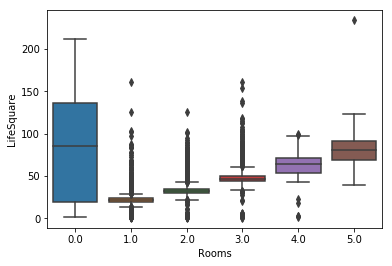

In [70]:
sns.boxplot(data['Rooms'], data['LifeSquare'])

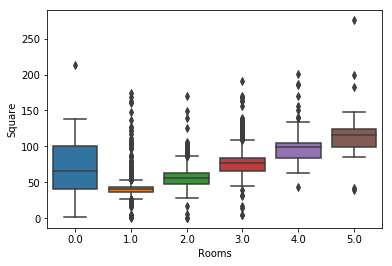

In [71]:
plot = sns.boxplot(data['Rooms'], data['Square'])

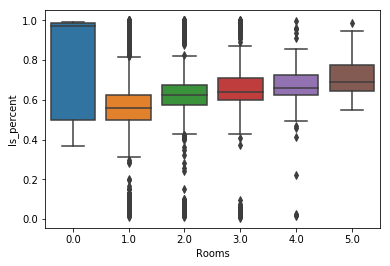

In [72]:
sns.boxplot(sup_df['Rooms'], sup_df['ls_percent'])

анализ выбросов по площади по бинам комнат

In [33]:
data[data['Square'] > 200]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1981   7917          27    0.0  212.932361  211.231125            0.0      2   
1982   5548          86    5.0  275.645284  233.949309           26.0     12   
4262     28           9    2.0  604.705972         NaN            1.0     17   
4690   2307         102    1.0  409.425181  410.639749           10.0      4   
6977  11602          30    2.0  641.065193  638.163193           10.0     20   
9910  16568          27    4.0  200.334539  201.627361           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1981         3.0       2008   0.211401         B         B         9   
1982        37.0       2011   0.161976         B         A        31   
4262        18.0       1977   0.161532         B         B        25   
4690         4.0       2016   0.238617         B         B        26   
6977        19.0       2019   0.000078         B         B        22   
9910         2.0       2013   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1981      1892         0           NaN            0        1       B   
1982      7010         5        4508.0            3        7       B   
4262      5648         1          30.0            2        4       B   
4690      3889         6         705.0            3        6       B   
6977      6398       141        1046.0            3       23       B   
9910     14892         4           NaN            1        4       B   

              Price  
1981  302211.260887  
1982  455264.882666  
4262  187717.242538  
4690   90470.430830  
6977  133529.681562  
9910  528560.506016

#### Исправим вручную выбросы по площади

видно, что средняя цена этих квартир соответствует среднему по данному кол-ву комнат, значит площадь указана некорректно, скорее всего в 10 раз больше рельной.


id <br>
28 - /10<br>
2307 - /10<br>
11602 - /10<br>

In [46]:
data.loc[data['Id'].isin([28, 2307, 11602]), 'Square'] = data['Square'] / 10
data.loc[data['Id'].isin([28, 2307, 11602]), 'LifeSquare'] = data['LifeSquare'] / 10

In [48]:
data[data['LifeSquare'] > 1000]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

очевидно тоже выброс /100

In [47]:
data.loc[data['LifeSquare'] > 1000, 'LifeSquare'] = data['LifeSquare'] / 100

In [55]:
data[data['LifeSquare'] > 200]


Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1981   7917          27    0.0  212.932361  211.231125            0.0      2   
1982   5548          86    5.0  275.645284  233.949309           26.0     12   
9910  16568          27    4.0  200.334539  201.627361           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1981         3.0       2008   0.211401         B         B         9   
1982        37.0       2011   0.161976         B         A        31   
9910         2.0       2013   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1981      1892         0           NaN            0        1       B   
1982      7010         5        4508.0            3        7       B   
9910     14892         4           NaN            1        4       B   

              Price  
1981  302211.260887  
1982  455264.882666  
9910  528560.506016

In [54]:
data.loc[data['Id'].isin([14990, 15886]), 'LifeSquare'] = np.NaN

In [67]:
data.loc[data['LifeSquare'] > data['Square'], 'LifeSquare'] = np.NaN

#### пересчитаем долю жилой площади и используем ее медиану по бину по кол-ву комнат для пересчета LifeSquare = median(lr_percent) * Square

/Users/anastasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


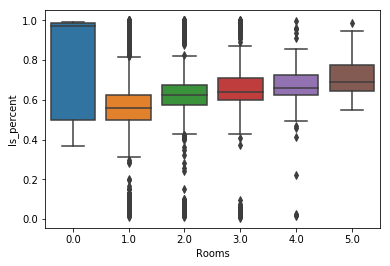

In [73]:
sup_df = data[['Rooms', 'Square', 'LifeSquare']]
sup_df['ls_percent'] = data['LifeSquare'] / data['Square']

sns.boxplot(sup_df['Rooms'], sup_df['ls_percent'])

In [112]:
sup_df = sup_df.groupby(['Rooms'], as_index=False)['ls_percent'].median()
sup_df

Rooms  ls_percent
0    0.0    0.969951
1    1.0    0.556192
2    2.0    0.622650
3    3.0    0.641547
4    4.0    0.658919
5    5.0    0.688025

In [130]:
data.loc[data['LifeSquare'].isna(), 'new_LifeSquare'] = data.loc[data['LifeSquare'].isna(), ['Rooms', 'Square']].merge(sup_df, how='left', on='Rooms')['ls_percent'].values * data.loc[data['LifeSquare'].isna(), ['Rooms', 'Square']].merge(sup_df, how='left', on='Rooms')['Square'].values
data.loc[~data['LifeSquare'].isna(), 'new_LifeSquare'] = data.loc[~data['LifeSquare'].isna(), 'LifeSquare']

In [132]:
data[~data['new_LifeSquare'].isna()].head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1  ... Ecology_3 Social_1  Social_2  \
0         9.0       1969   0.089040  ...         B       33      7976   
1         9.0       1978   0.000070  ...         B       46     10309   
2        12.0       1968   0.049637  ...         B       34      7759   
3        17.0       1977   0.437885  ...         B       23      5735   
4        12.0       1976   0.012339  ...         B       35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
0         5           NaN            0       11        B  184966.930730   
1         1         240.0            1       16        B  300009.450063   
2         0         229.0            1        3        B  220925.908524   
3         3        1084.0            0        5        B  175616.227217   
4         1        2078.0            2        4        B  150226.531644   

   new_LifeSquare  
0       29.442751  
1       40.049543  
2       29.197612  
3       52.731512  
4       23.776169  

[5 rows x 21 columns]

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id                10000 non-null int64
DistrictId        10000 non-null int64
Rooms             10000 non-null float64
Square            10000 non-null float64
LifeSquare        7405 non-null float64
KitchenSquare     10000 non-null float64
Floor             10000 non-null int64
HouseFloor        10000 non-null float64
HouseYear         10000 non-null int64
Ecology_1         10000 non-null float64
Ecology_2         10000 non-null object
Ecology_3         10000 non-null object
Social_1          10000 non-null int64
Social_2          10000 non-null int64
Social_3          10000 non-null int64
Healthcare_1      5202 non-null float64
Helthcare_2       10000 non-null int64
Shops_1           10000 non-null int64
Shops_2           10000 non-null object
Price             10000 non-null float64
new_LifeSquare    10000 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 

In [134]:
data[['Ecology_1', 'Ecology_2', 'Ecology_3']]

Ecology_1 Ecology_2 Ecology_3
0     8.903972e-02         B         B
1     6.998930e-05         B         B
2     4.963726e-02         B         B
3     4.378852e-01         B         B
4     1.233889e-02         B         B
5     3.094791e-01         B         B
6     4.605564e-01         B         B
7     7.577876e-02         B         B
8     7.122317e-03         B         B
9     7.577876e-02         B         B
10    1.185374e-01         B         B
11    0.000000e+00         B         B
12    9.079910e-02         B         B
13    1.332153e-01         B         B
14    7.215758e-02         B         B
15    3.717782e-02         B         B
16    5.181543e-02         B         B
17    6.975336e-02         B         B
18    1.332153e-01         B         B
19    9.913630e-04         B         B
20    3.198094e-01         B         B
21    2.114012e-01         B         B
22    4.112463e-02         B         B
23    6.076152e-03         B         B
24    2.074133e-02         B         B
25    7.577876e-02         B         B
26    7.215758e-02         B         B
27    7.577876e-02         B         B
28    3.465608e-02         B         B
29    1.696760e-04         B         B
...            ...       ...       ...
9970  1.496664e-01         B         B
9971  1.004557e-01         B         B
9972  2.432045e-01         B         B
9973  1.800000e-09         B         B
9974  7.815280e-05         B         B
9975  7.215758e-02         B         B
9976  1.185374e-01         B         B
9977  6.076152e-03         B         B
9978  7.122317e-03         B         B
9979  1.356498e-01         B         B
9980  2.827977e-01         B         B
9981  6.998930e-05         B         B
9982  4.378852e-01         B         B
9983  2.432045e-01         B         B
9984  3.711490e-01         B         B
9985  2.114012e-01         B         B
9986  7.122317e-03         B         B
9987  3.465608e-02         B         B
9988  4.963726e-02         B         B
9989  4.111635e-02         B         B
9990  3.627009e-02         B         B
9991  2.650887e-01         B         B
9992  3.003225e-01         B         B
9993  9.079910e-02         B         B
9994  7.577876e-02         B         B
9995  1.356498e-01         B         B
9996  0.000000e+00         B         B
9997  7.215758e-02         B         B
9998  3.074667e-01         B         A
9999  0.000000e+00         B         B

[10000 rows x 3 columns]

In [137]:
data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

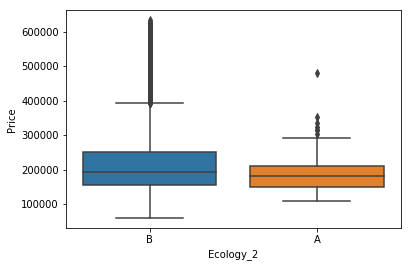

In [138]:
sns.boxplot(data['Ecology_2'], data['Price'])

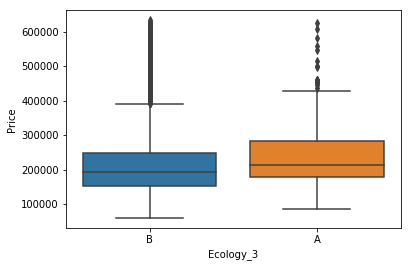

In [139]:
sns.boxplot(data['Ecology_3'], data['Price'])

In [155]:
sns.pairplot(data.loc[:, ['Ecology_1', 'Price']])

[0, 250, 1900, 2030]

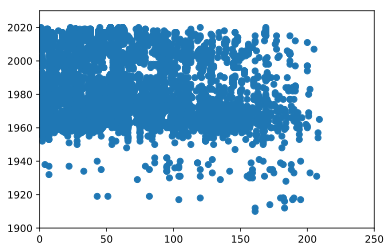

In [154]:
ax = plt.scatter(data['DistrictId'], data['HouseYear'])
plt.axis([0, 250, 1900, 2030])

In [156]:
data['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

(array([  16.,   13.,   45.,   34.,  851., 1817., 3717.,  755.,  913.,
        1837.]),
 array([1910., 1921., 1932., 1943., 1954., 1965., 1976., 1987., 1998.,
        2009., 2020.]),
 <a list of 10 Patch objects>)

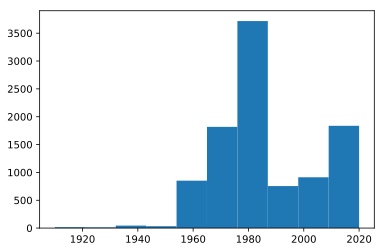

In [161]:
plt.hist(data.loc[data['HouseYear'] < 4000, 'HouseYear'].values)

In [160]:
data.loc[data['HouseYear'] < 4000, 'HouseYear'].values

array([1969, 1978, 1968, ..., 2015, 1961, 1990])

In [181]:
# ax = plt.scatter(data[data['HouseYear'] < 3000]['Price'], data[data['HouseYear'] < 3000]['HouseYear'])

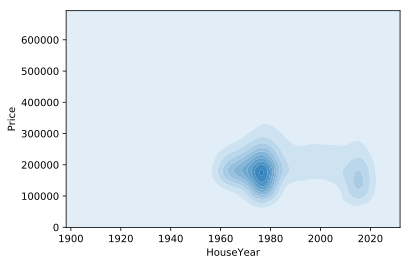

In [175]:
ax = sns.kdeplot(data[data['HouseYear'] < 3000]['HouseYear'], data[data['HouseYear'] < 3000]['Price'], shade=True)

In [183]:
data.loc[data['HouseYear'] > 2020, :]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price, new_LifeSquare]
Index: []

In [166]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = (2005 + 2011)/2

In [176]:
data['HouseYear'].median()  # на графике kde видно, что квартира с такой ценой вполне может иметь медианное значение года

1977.0

In [179]:
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = data['HouseYear'].median()

1) сделать псевдопеременные(mean price) для id переменных - DistrictID например, Ecology 2-3?<br>
2) dummi переменные